# Analysis of Results

## Time Analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

instance_sizes = np.array(
    [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30], dtype=float
)
baseline_cost = np.array(
    [75, 150, 210, 285, 345, 420, 495, 555, 630, 690, 765, 840, 900, 975, 1035],
    dtype=float,
)
best_water_cost = np.array(
    [75, 120, 147, 201, 210, 264, 309, 327, 381, 408, 453, 507, 525, 579, 579],
    dtype=float,
)

perc_saved = 100 * (baseline_cost - best_water_cost) / baseline_cost

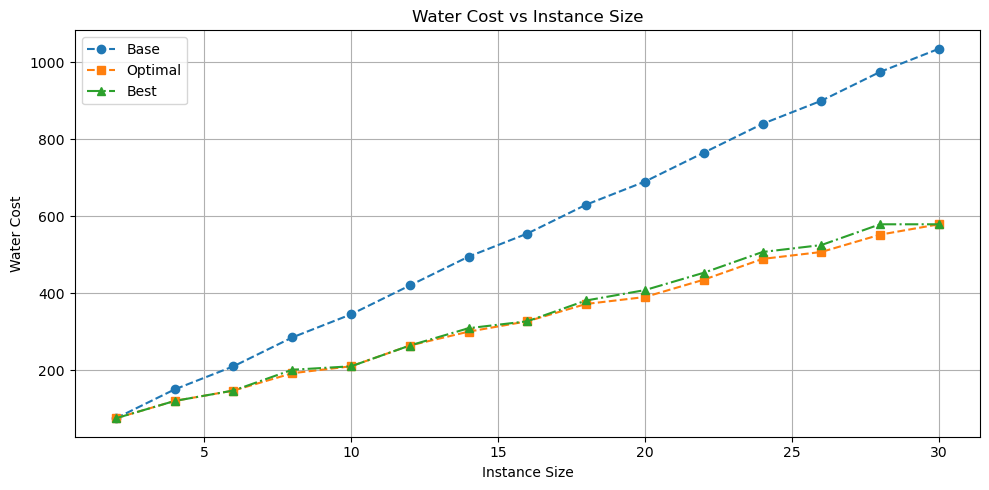

In [8]:
NUM_READS = 50
instance_sizes = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
baseline_cost = [
    75,
    150,
    210,
    285,
    345,
    420,
    495,
    555,
    630,
    690,
    765,
    840,
    900,
    975,
    1035,
]
optimal_water_cost = [
    75,
    120,
    147,
    192,
    210,
    264,
    300,
    327,
    372,
    390,
    435,
    489,
    507,
    552,
    579,
]
best_water_cost = [
    75,
    120,
    147,
    201,
    210,
    264,
    309,
    327,
    381,
    408,
    453,
    507,
    525,
    579,
    579,
]

# --- Plot 1: Water Cost vs Instance Size for Base, Optimal, and Best ---
plt.figure(figsize=(10, 5))
plt.plot(instance_sizes, baseline_cost, marker="o", linestyle="--", label="Base")
plt.plot(
    instance_sizes, optimal_water_cost, marker="s", linestyle="--", label="Optimal"
)
plt.plot(instance_sizes, best_water_cost, marker="^", linestyle="-.", label="Best")
plt.xlabel("Instance Size")
plt.ylabel("Water Cost")
plt.title("Water Cost vs Instance Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitted parameters for the saturating exponential model:
L = 40.838
k = 0.294


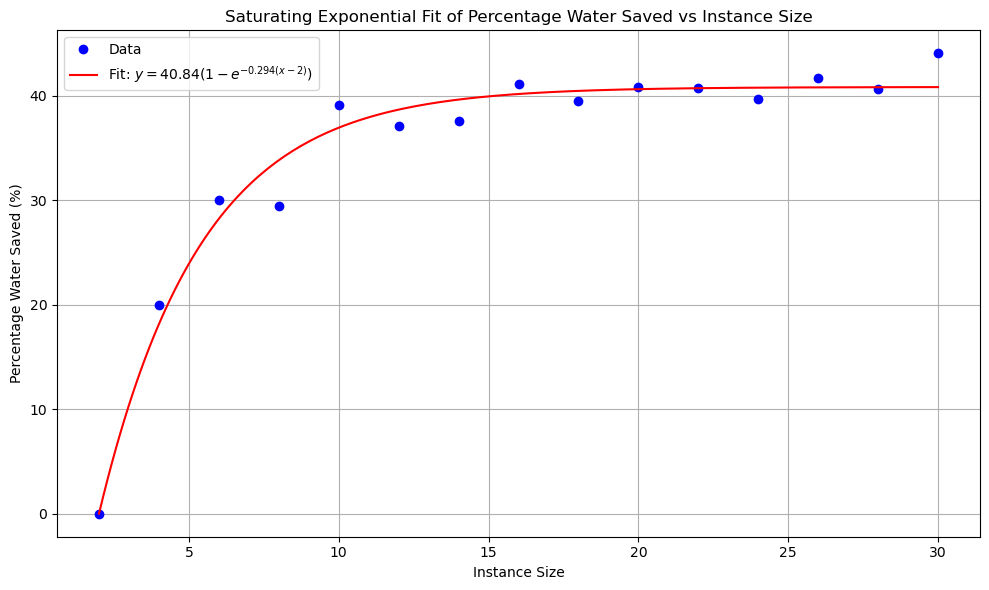

In [9]:
# Define the saturating exponential model:
# Here we assume x0 = 2 so that y(2) = L*(1 - exp(-k*(2-2))) = 0.
def sat_exp(x, L, k):
    return L * (1 - np.exp(-k * (x - 2)))


# Provide initial guesses for L and k.
# For example, L might be near the plateau (~45) and k can start around 0.1.
initial_guess = [45, 0.1]

# Use curve_fit to fit the model to the data.
popt, pcov = curve_fit(sat_exp, instance_sizes, perc_saved, p0=initial_guess)
L_fit, k_fit = popt

print("Fitted parameters for the saturating exponential model:")
print(f"L = {L_fit:.3f}")
print(f"k = {k_fit:.3f}")

# Generate a dense set of x values for plotting the fitted curve
x_fit = np.linspace(instance_sizes[0], instance_sizes[-1], 200)
y_fit = sat_exp(x_fit, L_fit, k_fit)

# Plot the data and the saturating exponential fit.
plt.figure(figsize=(10, 6))
plt.plot(instance_sizes, perc_saved, "bo", label="Data")
plt.plot(x_fit, y_fit, "r-", label=f"Fit: $y = {L_fit:.2f}(1-e^{{-{k_fit:.3f}(x-2)}})$")
plt.xlabel("Instance Size")
plt.ylabel("Percentage Water Saved (%)")
plt.title("Saturating Exponential Fit of Percentage Water Saved vs Instance Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Run 1

In [10]:
# --- Provided Data ---
NUM_READS = 50
instance_sizes_full = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
simulated_times = [
    0.28,
    2.03,
    6.71,
    15.68,
    31.03,
    54.88,
    89.53,
    130.13,
    188.7,
    270.51,
    389.86,
    497.0,
    670.29,
    851.74,
    1095.64,
]
feasible_solutions = [50, 50, 50, 50, 50, 50, 41, 47, 21, 49, 26, 24, 24, 21, 26]
best_water_costs = [
    75,
    120.0,
    147.0,
    201.0,
    210.0,
    264.0,
    309.0,
    327.0,
    381.0,
    408.0,
    453.0,
    507.0,
    525.0,
    579.0,
    579.0,
]
optimal_water_costs = [
    75,
    120,
    147.0,
    192.0,
    210.0,
    264.0,
    300.0,
    327.0,
    372.0,
    390.0,
    435.0,
    489.0,
    507.0,
    552.0,
    579.0,
]

# Safety
instance_sizes = instance_sizes_full[: len(simulated_times)]
normalized_simulated_times = [t / NUM_READS for t in simulated_times]

In [11]:
# --- Theoretical Time Calculation ---
# Big O model: T(n) = C * (2^n * n^2)
# Calibrate C using the normalized simulated time for the smallest instance size.
n0 = instance_sizes[0]
C = normalized_simulated_times[0] / ((2**n0) * (n0**2))
print("Constant scaling factor C:", C)

# Compute theoretical times per run for each instance size.
theoretical_times = [C * ((2**n) * (n**2)) for n in instance_sizes]
print("Theoretical times (normalized per run):", theoretical_times)

Constant scaling factor C: 0.00035000000000000005
Theoretical times (normalized per run): [0.005600000000000001, 0.08960000000000001, 0.8064000000000001, 5.734400000000001, 35.84, 206.43840000000003, 1123.9424000000001, 5872.025600000001, 29727.129600000004, 146800.64, 710515.0976000001, 3382286.7456000005, 15877957.222400002, 73658689.12640001, 338228674.56000006]


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_74389/3639167744.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Time Analysis: Normalized Simulated vs. Theoretical (Scaled as $2^n \cdot n^2$)')


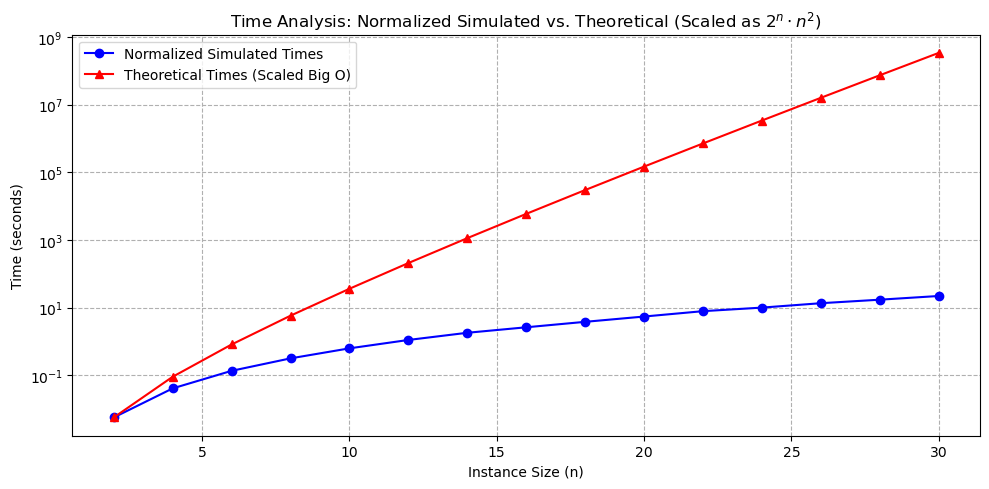

In [12]:
# --- Plot Time Analysis on a Log Scale ---
plt.figure(figsize=(10, 5))
plt.plot(
    instance_sizes,
    normalized_simulated_times,
    "bo-",
    label="Normalized Simulated Times",
)
plt.plot(
    instance_sizes, theoretical_times, "r^-", label="Theoretical Times (Scaled Big O)"
)

plt.xlabel("Instance Size (n)")
plt.ylabel("Time (seconds)")
plt.title(
    "Time Analysis: Normalized Simulated vs. Theoretical (Scaled as $2^n \cdot n^2$)"
)
plt.yscale("log")  # Set y-axis to logarithmic scale for better visualization
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()